In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [5]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
dataset2 = dataset.copy().drop(columns=['user' , 'first_open' ,'screen_list', 'enrolled' , 'enrolled_date'])

In [7]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


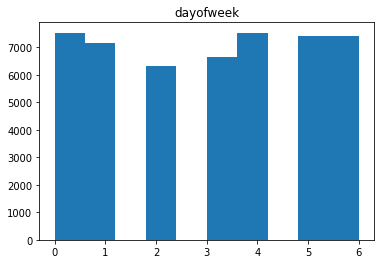

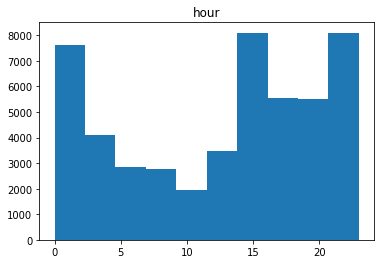

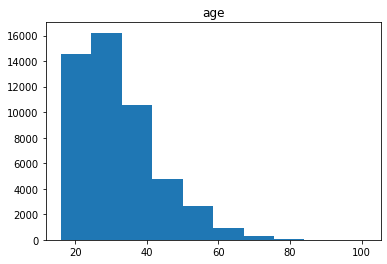

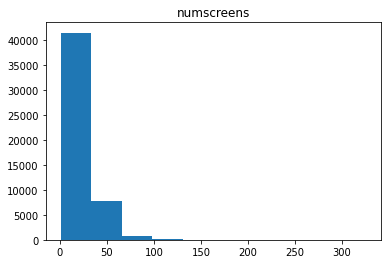

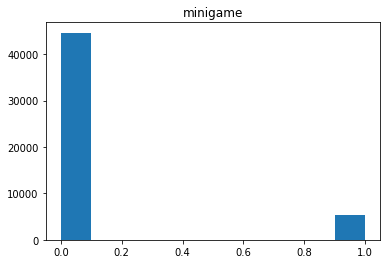

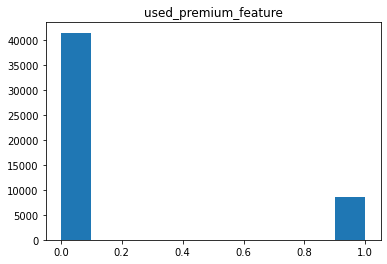

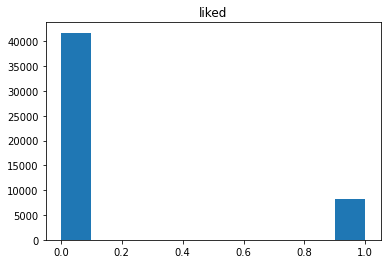

In [8]:
for i in dataset2.columns:
  plt.hist(dataset2[i])
  plt.title(i)
  plt.show()
  print('\n')

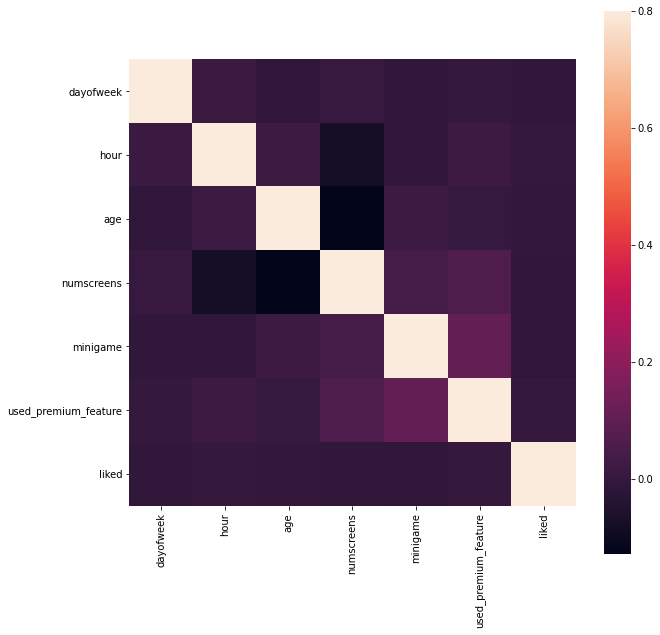

In [9]:
corrmat = dataset2.corr()
figure = plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [10]:
from dateutil import parser

In [11]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data , str) else row_data for row_data in dataset['enrolled_date']]

In [12]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [13]:
dataset['difference'] =(dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')

In [14]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


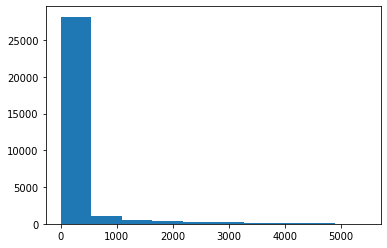

In [15]:
plt.hist(dataset['difference'].dropna())
plt.show()

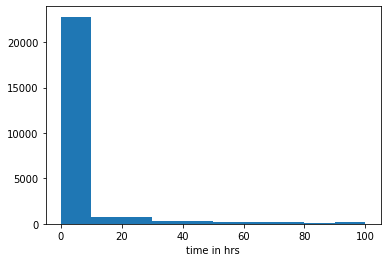

In [16]:
plt.hist(dataset['difference'].dropna() , range=[0,100])
plt.xlabel('time in hrs')
plt.show()

In [17]:
dataset.loc[dataset.difference>48 , 'enrolled']=0

In [18]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [19]:
dataset.drop(columns=['first_open' , 'enrolled_date' , 'difference'] , inplace=True)

In [20]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [21]:
dataset['screen_list'][0]

'idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login'

In [22]:
dataset['screen_list'] = dataset.screen_list.astype(str)+','

In [23]:
dataset['screen_list'][0]

'idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login,'

In [24]:
top_screens = pd.read_csv('top_screens.csv')

In [25]:
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [26]:
top_screens = top_screens['top_screens']

In [27]:
top_screens = top_screens.values

In [28]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [29]:
for sc  in top_screens:
  dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
  dataset['screen_list'] = dataset.screen_list.str.replace(sc+',' , '')

In [30]:
dataset['Other'] = dataset.screen_list.str.count(',')
dataset = dataset.drop(columns=['screen_list'])

In [31]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [32]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [33]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [34]:
response = dataset['enrolled']
dataset = dataset.drop(columns=['user' , 'enrolled'])

In [35]:
response = np.array(response)
dataset = np.array(dataset)

In [36]:
response[0]

0

In [37]:
dataset[0]

array([ 3,  2, 23, 15,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  1])

In [38]:
dataset.shape

(50000, 48)

In [39]:
response.shape

(50000,)

In [40]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(dataset , response , test_size=0.3 , random_state=0)

In [41]:
x_train

array([[ 3,  2, 27, ...,  3,  0,  1],
       [ 1, 15, 20, ...,  1,  0,  1],
       [ 1, 17, 31, ...,  1,  0,  1],
       ...,
       [ 3,  6, 25, ...,  0,  0,  0],
       [ 4, 13, 27, ...,  0,  0,  0],
       [ 1, 18, 20, ...,  0,  0,  1]])

In [42]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [43]:
x_train.shape

(35000, 48)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(x_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred = classifier.predict(x_test)

In [47]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[6094, 1452],
       [1848, 5606]])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.78

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=187 , random_state = 0)
classifier2.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=187,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred2 = classifier2.predict(x_test)

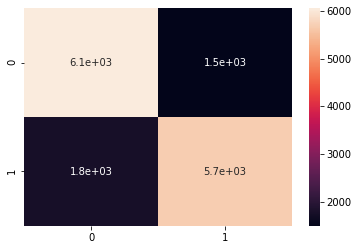

In [52]:
sns.heatmap(confusion_matrix(y_test , y_pred2) , annot=True)

In [53]:
accuracy_score(y_test , y_pred2)

0.7828

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = x_train , y=y_train , cv=10)
print(accuracies.mean())
print(accuracies.std())

0.7763142857142857
0.005430751441972824


In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C':[0.1,0.5,0.9,1.0]
}
grid = GridSearchCV(estimator=classifier , param_grid = parameters ,scoring='accuracy' ,n_jobs=-1 , cv=10)

In [59]:
grid = grid.fit(x_train , y_train)

In [60]:
grid.best_score_

0.7763142857142857

In [61]:
grid.best_params_

{'C': 1.0}

In [ ]:
#Thank you!!